In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# define golden ratio
gr = (np.sqrt(5) + 1)/2

def golden_search(func, a, b, tol):
    '''
    Params:
    -------
    func = function you want to find the minima of
    a, b = lower bound, upper bound
    tol = when to stop
    
    Output:
    -------
    (b+a)/2 = the midpoint of the boundary that is within the tolerance defined
    '''
    
    c = b - (b - a)/gr
    d = a + (b - a)/gr
    
    while np.abs(c - d) > tol:
        if func(c) < func(d): # change this back to f(c) < f(d) --> min
            b = d
        else:
            a = c
        c = b - (b-a)/gr
        d = a + (b-a)/gr
    return (b+a)/2

def test_func(x):
    '''
    just a test function to make sure things are workin okay
    '''
    return (x-3)**2


tol = np.sqrt(1e-15)
test_min = golden_search(test_func, 1, 3, tol)
test_min


2.9999999515345115

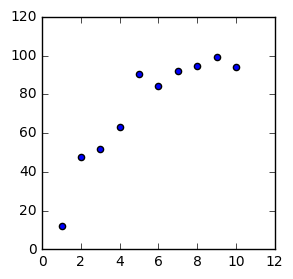

In [3]:
# lets read in the data
data = np.loadtxt('rot.dat')
r_obs = data[:,0]
v_obs = data[:,1]

def v_model(r0, r):
    '''
    Params:
    -------
    r0 = characteristic radius
    r = radius
    
    Output:
    -------
    v_mod = velocity predicted by the supplied model
    '''
    v_mod = 100 * (1 - np.exp(-r/r0))
    return v_mod


# now lets visualize to get an idea of what we're working with
fig,ax = plt.subplots(1,1)
fig.set_size_inches(3,3)

ax.scatter(r_obs, v_obs)


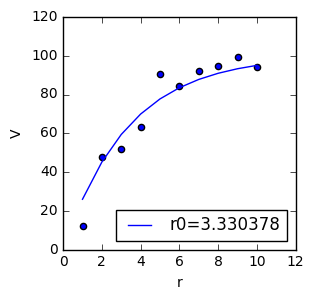

In [4]:
# now to find the best r0 through minimizing the square of the errors

# we want to minimize the error given by:

def calc_error(r0, r_obs, v_obs):
    '''
    Params:
    ------
    r0 = characteristic radius
    r_obs = radius
    v_obs = velocity
    
    Output:
    -------
    err = the error between observed and model, squared    
    '''
    err = (v_obs - v_model(r0, r_obs))**2
    return err

def err_sum(r):
    '''
    Params:
    ------
    r = characteristic radius
    
    Output:
    ------
    err_sum = the sum of the errors between model and observed for each r0 (characteristic radius)
    '''
    err_r0 = np.array([])
    for robs, vobs in zip(r_obs, v_obs):
        e = calc_error(r, robs, vobs)
        err_r0 = np.append(err_r0, e)
    err_sum = np.sum(err_r0)
    return err_sum

# characteristic radius
crit_r0 = golden_search(err_sum, 3, 4, tol)
v_mod = v_model(crit_r0, r_obs)

# plots and overlay model over observed data
fig,ax = plt.subplots(1,1)
fig.set_size_inches(3,3)

ax.plot(r_obs, v_mod, label='r0={0:f}'.format(crit_r0))
ax.scatter(r_obs, v_obs)
ax.set(xlabel='r', ylabel='V')
ax.legend(loc=4)

